In [1]:
data<-read.csv("camera_accesory_final")
summary(data)

   week_year       list_price    product_mrp          gmv           units      
 Min.   : 4.00   Min.   : 299   Min.   : 829.6   Min.   : 299   Min.   :1.000  
 1st Qu.:16.00   1st Qu.:1062   1st Qu.:1990.0   1st Qu.:1073   1st Qu.:1.016  
 Median :28.00   Median :1217   Median :2259.6   Median :1225   Median :1.020  
 Mean   :28.39   Mean   :1200   Mean   :2211.4   Mean   :1210   Mean   :1.020  
 3rd Qu.:41.00   3rd Qu.:1350   3rd Qu.:2462.7   3rd Qu.:1369   3rd Qu.:1.024  
 Max.   :53.00   Max.   :1652   Max.   :2780.2   Max.   :1660   Max.   :1.034  
      sla        promotional_offer     number       Total.Investment
 Min.   :5.393   Min.   :0.03354   Min.   :0.0000   Min.   :  5.10  
 1st Qu.:5.834   1st Qu.:0.43886   1st Qu.:0.0000   1st Qu.: 48.10  
 Median :6.130   Median :0.47063   Median :0.0000   Median : 70.02  
 Mean   :6.187   Mean   :0.47757   Mean   :0.7755   Mean   : 74.20  
 3rd Qu.:6.373   3rd Qu.:0.52292   3rd Qu.:2.0000   3rd Qu.:100.00  
 Max.   :8.400   Max.   :0

### Basic Linear Model

In [2]:
# Building the Baisc Linear regression Model
Linear_model <-data
Linear_model <- scale(Linear_model)
Linear_model <-data.frame(Linear_model)
model_1 <- lm(gmv~.,Linear_model)
print(summary(model_1))


Call:
lm(formula = gmv ~ ., data = Linear_model)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008114 -0.003469  0.000000  0.001794  0.011060 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.009e-17  1.248e-03   0.000   1.0000    
week_year                4.066e-03  2.404e-02   0.169   0.8685    
list_price               1.011e+00  5.529e-02  18.289 3.95e-10 ***
product_mrp              5.203e-03  1.178e-02   0.442   0.6665    
units                    1.508e-02  6.203e-03   2.431   0.0317 *  
sla                     -5.199e-03  5.575e-03  -0.933   0.3694    
promotional_offer       -7.752e-02  6.766e-02  -1.146   0.2743    
number                   7.539e-04  4.342e-03   0.174   0.8651    
Total.Investment         1.073e-01  1.796e-01   0.597   0.5614    
TV                      -4.232e-02  6.594e-02  -0.642   0.5330    
Digital                  1.205e-02  9.894e-02   0.122   0.9051    
Sponsorship      

Model Selection

In [3]:
library(car)
library(MASS)

all_vifs <- vif(model_1)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Linear_model)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

##Final Model 
Linear_Final_model <- selectedMod
print(summary(Linear_Final_model))  




Call:
lm(formula = myForm, data = Linear_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43777 -0.44631 -0.05914  0.37874  2.18697 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.187e-15  1.090e-01   0.000 1.000000    
week_year            3.393e-01  1.380e-01   2.458 0.018920 *  
units                5.716e-01  1.312e-01   4.357 0.000105 ***
sla                  1.883e-01  1.288e-01   1.462 0.152343    
number              -5.584e-02  1.202e-01  -0.465 0.644923    
Digital             -1.628e-01  1.280e-01  -1.272 0.211460    
per_order            8.583e-03  1.216e-01   0.071 0.944135    
Middle_p            -2.114e-02  1.157e-01  -0.183 0.856062    
Mass_p               9.914e-02  1.242e-01   0.798 0.429940    
Premium_p            2.472e-01  1.171e-01   2.111 0.041792 *  
promotional_offer.1 -2.503e-03  1.314e-01  -0.019 0.984908    
promotional_offer.3  9.297e-02  1.162e-01   0.800 0.428886    
NPS.3        

k-fold Cross Validation

In [4]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data = Linear_model, method = "lm",
               trControl = train.control)
# Summarize the results
print(cross_val)


Loading required package: lattice
Loading required package: ggplot2
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

Linear Regression 

49 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.9233115  0.4580761  0.7304581

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

              Variable    Elasticity direction
1            week_year -0.0495853269  Negative
2                units 24.9064552952  Positive
3                  sla -0.4304381214  Negative
4               number -0.0093415869  Negative
5              Digital -0.0011914448  Negative
6            per_order  0.0012832305  Positive
7             Middle_p -0.0005525464  Negative
8               Mass_p  0.0338460754  Positive
9            Premium_p  0.0146571285  Positive
10 promotional_offer.1 -0.0013794161  Negative
11 promotional_offer.3  0.0633376994  Positive
12               NPS.3 -0.0319654647  Negative


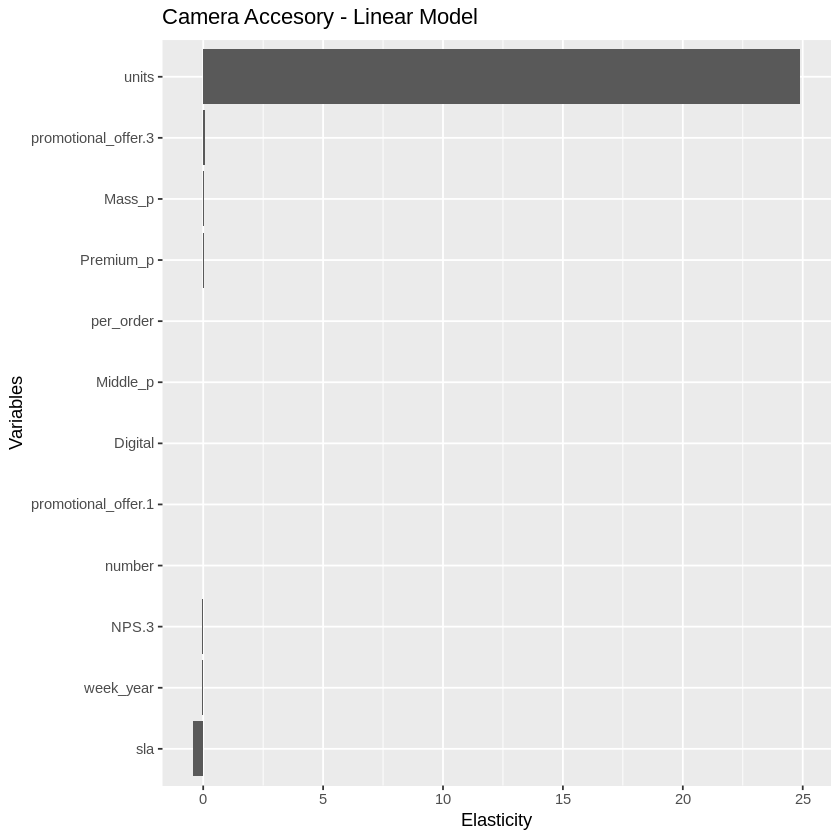

In [5]:
# Elasticity Analysis
train <- Linear_model
hrlm<-Linear_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs)


print(ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Camera Accesory - Linear Model") +xlab("Variables"))


### Multiplicative Model

In [6]:
multi <-data
multi <- multi[,-c(20:28)]
multi$number[which(multi$number==0)] <- 0.01
multi$Content.Marketing[which(multi$Content.Marketing==0)] <- 0.01
multi$per_order[which(multi$per_order==0)] <- 0.01
multi$TV[which(multi$TV==0)] <- 0.01
multi <- log(multi)
## First model ##
multi_model <- lm(gmv~.,multi)
print(summary(multi_model))


Call:
lm(formula = gmv ~ ., data = multi)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.607e-03 -7.143e-04  4.245e-05  7.794e-04  2.493e-03 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.962e-01  4.047e-01  -0.979  0.33871    
week_year                4.279e-03  4.099e-03   1.044  0.30833    
list_price               9.803e-01  1.084e-02  90.410  < 2e-16 ***
product_mrp              1.372e-02  1.317e-02   1.042  0.30923    
units                    5.014e-01  1.131e-01   4.435  0.00023 ***
sla                     -1.058e-02  9.197e-03  -1.150  0.26311    
promotional_offer       -1.286e-02  1.022e-02  -1.259  0.22196    
number                  -7.779e-05  1.399e-04  -0.556  0.58395    
Total.Investment         1.470e-02  1.500e-02   0.980  0.33817    
TV                      -8.080e-04  3.446e-03  -0.234  0.81692    
Digital                  4.425e-03  3.904e-03   1.134  0.26973    
Sponsorship   

Model Selection

In [7]:
library(car)
library(MASS)

all_vifs <- vif(multi_model)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 1.1)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=multi)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

Multi_Final_model <- selectedMod
print(summary(Multi_Final_model))



Call:
lm(formula = myForm, data = multi)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01624 -0.10997  0.01767  0.14218  0.51446 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.54956    1.38307   4.013 0.000236 ***
week_year            0.05783    0.05740   1.007 0.319339    
Content.Marketing    0.03712    0.01827   2.032 0.048373 *  
list_price.1         0.32905    0.13731   2.396 0.020977 *  
list_price.3        -0.13019    0.13845  -0.940 0.352314    
promotional_offer.3  0.01281    0.09582   0.134 0.894239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2613 on 43 degrees of freedom
Multiple R-squared:  0.2475,	Adjusted R-squared:   0.16 
F-statistic: 2.828 on 5 and 43 DF,  p-value: 0.02704



k-fold Cross Validation

In [8]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val1 <- train(myForm, data = multi, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val1)

Linear Regression 

49 samples
 5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2924558  0.2562356  0.2160782

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

             Variable   Elasticity direction
1           week_year  0.025891341  Positive
2   Content.Marketing -0.008510921  Negative
3        list_price.1  0.328351261  Positive
4        list_price.3 -0.129706844  Negative
5 promotional_offer.3 -0.001411497  Negative


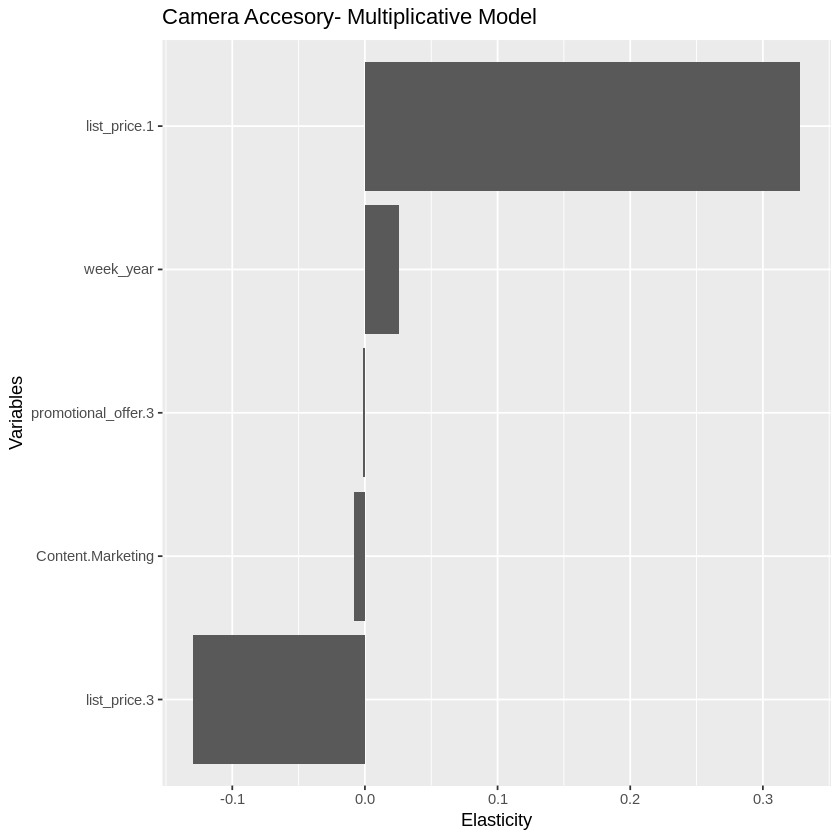

In [9]:
# Elasticity Analysis
train1 <- multi
hrlm1<-Multi_Final_model
# estimating the elasticity coefficients
elasticity1 <- function(var){
  
  elax2 <-as.numeric(hrlm1$coefficients[var]*mean(train1[,var])/mean(train1$gmv))
  
  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm1$coefficients)){
  
  var_list[i-1] <-elasticity1(names(hrlm1$coefficients)[i])
  
}

elasticity.outputs1 <- data.frame(names(hrlm1$coefficients[2:length(hrlm1$coefficients)]))
elasticity.outputs1 <- cbind(elasticity.outputs1,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs1) <- c("Variable","Elasticity")

elasticity.outputs1$direction <- ifelse(elasticity.outputs1$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs1)


ggplot(data=elasticity.outputs1, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Camera Accesory- Multiplicative Model") +xlab("Variables")


### Kyock Model

In [10]:
library(DataCombine)
Home_koyck<-data
#gmv Lag 1
Home_Koyck<-slide(Home_koyck,Var="gmv",slideBy =-1)
Home_Koyck<-na.omit(Home_koyck)
Home_Koyck<-scale(Home_koyck)
Home_Koyck<-data.frame(Home_koyck)

# Build Kyock model
Koy_model <- lm(gmv~.,Home_koyck)
print(summary(Koy_model))




Remember to put Home_koyck in time order before running.

Lagging gmv by 1 time units.




Call:
lm(formula = gmv ~ ., data = Home_koyck)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1690 -0.9274  0.0000  0.4795  2.9565 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -6.606e+02  4.163e+02  -1.587   0.1385    
week_year                7.391e-02  4.369e-01   0.169   0.8685    
list_price               1.021e+00  5.580e-02  18.289 3.95e-10 ***
product_mrp              3.945e-03  8.930e-03   0.442   0.6665    
units                    5.909e+02  2.431e+02   2.431   0.0317 *  
sla                     -2.823e+00  3.027e+00  -0.933   0.3694    
promotional_offer       -2.193e+02  1.914e+02  -1.146   0.2743    
number                   1.484e-01  8.547e-01   0.174   0.8651    
Total.Investment         6.893e-01  1.154e+00   0.597   0.5614    
TV                      -4.458e+00  6.945e+00  -0.642   0.5330    
Digital                  1.027e+00  8.432e+00   0.122   0.9051    
Sponsorship             -3.958e-01  5.7

In [11]:
all_vifs <- vif(Koy_model)
 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Home_koyck)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

kyock_Final_model <- selectedMod
summary(kyock_Final_model)


Call:
lm(formula = myForm, data = Home_koyck)

Residuals:
    Min      1Q  Median      3Q     Max 
-384.35 -119.31  -15.81  101.24  584.62 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.171e+04  5.142e+03  -4.222 0.000157 ***
week_year            6.167e+00  2.509e+00   2.458 0.018920 *  
units                2.240e+04  5.141e+03   4.357 0.000105 ***
sla                  1.023e+02  6.993e+01   1.462 0.152343    
number              -1.099e+01  2.365e+01  -0.465 0.644923    
Digital             -1.388e+01  1.091e+01  -1.272 0.211460    
per_order            1.240e+01  1.758e+02   0.071 0.944135    
Middle_p            -1.784e+01  9.766e+01  -0.183 0.856062    
Mass_p               1.296e-02  1.624e-02   0.798 0.429940    
Premium_p            4.625e+02  2.191e+02   2.111 0.041792 *  
promotional_offer.1 -7.099e+00  3.727e+02  -0.019 0.984908    
promotional_offer.3  2.641e+02  3.300e+02   0.800 0.428886    
NPS.3               -1.79

k-fold Cross Validation

In [12]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val2 <- train(myForm, data = Home_koyck, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val2)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

Linear Regression 

49 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  246.8205  0.4580761  195.2667

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

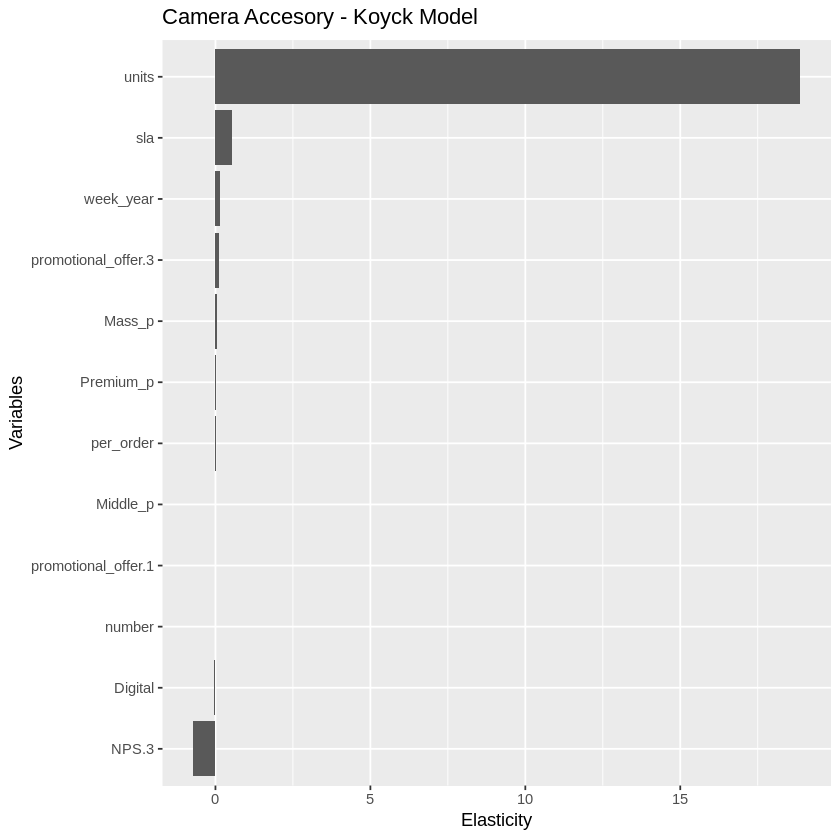

In [13]:
# Elasticity Analysis
train2 <- Home_koyck
hrlm2<-kyock_Final_model
# estimating the elasticity coefficients
elasticity2 <- function(var){
  
  elax2 <-as.numeric(hrlm2$coefficients[var]*mean(train2[,var])/mean(train2$gmv))

  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm2$coefficients)){
  
  var_list[i-1] <-elasticity2(names(hrlm2$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm2$coefficients[2:length(hrlm2$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Camera Accesory - Koyck Model") +xlab("Variables")

### Distributed Lag Model

In [14]:
Dis_Model <- data
Dis_model <- slide(Dis_Model, Var = "gmv",slideBy = -1)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -2)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -3)
Dis_model <- na.omit(Dis_model)
Dis_model <- scale(Dis_model)
Dis_model <- data.frame(Dis_model)

dist_model <- lm(gmv~.,Dis_model)
print(summary(dist_model))



Remember to put Dis_Model in time order before running.

Lagging gmv by 1 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 2 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Dis_model)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0066929 -0.0010205 -0.0000631  0.0011146  0.0065563 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              7.434e-16  1.068e-03   0.000   1.0000    
week_year               -7.139e-02  3.315e-02  -2.154   0.0747 .  
list_price               1.055e+00  5.987e-02  17.625 2.14e-06 ***
product_mrp              1.719e-02  1.226e-02   1.402   0.2104    
units                    1.907e-02  8.367e-03   2.280   0.0628 .  
sla                     -1.037e-02  6.038e-03  -1.717   0.1368    
promotional_offer       -1.112e-01  6.838e-02  -1.626   0.1552    
number                   5.980e-03  5.132e-03   1.165   0.2882    
Total.Investment        -1.804e-02  2.104e-01  -0.086   0.9344    
TV                       1.156e-01  1.088e-01   1.062   0.3290    
Digital                 -1.191e+00  5.919e-01  -2.012   0.0909 .  
Sponsorshi

Model Selection

In [15]:
all_vif <- vif(dist_model)
signif_all <- names(all_vif)

 while(any(all_vif > 2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Dis_model)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

Distributed_Final_model <- selectedMod
print(summary(Distributed_Final_model))



Call:
lm(formula = myForm, data = Dis_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78485 -0.17571  0.01666  0.22250  0.44425 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              8.301e-16  4.876e-02   0.000   1.0000    
product_mrp              8.750e-01  5.524e-02  15.840  < 2e-16 ***
number                  -6.715e-02  5.697e-02  -1.179   0.2472    
Digital                 -9.824e-02  5.594e-02  -1.756   0.0887 .  
Affiliates               7.652e-02  6.886e-02   1.111   0.2747    
product_procurement_sla  4.242e-01  5.453e-02   7.779 7.16e-09 ***
per_order               -6.879e-03  5.631e-02  -0.122   0.9035    
Middle_p                -5.156e-03  5.185e-02  -0.099   0.9214    
Mass_p                  -1.561e-01  6.531e-02  -2.390   0.0229 *  
Premium_p                7.573e-02  5.223e-02   1.450   0.1568    
promotional_offer.2      9.224e-02  6.120e-02   1.507   0.1416    
promotional_offer.3      8.196e

K-FOLD CROSS VALIDATION

In [16]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Dis_model , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

Linear Regression 

46 samples
13 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 41, 40, 41, 42, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5917459  0.7132646  0.4481458

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

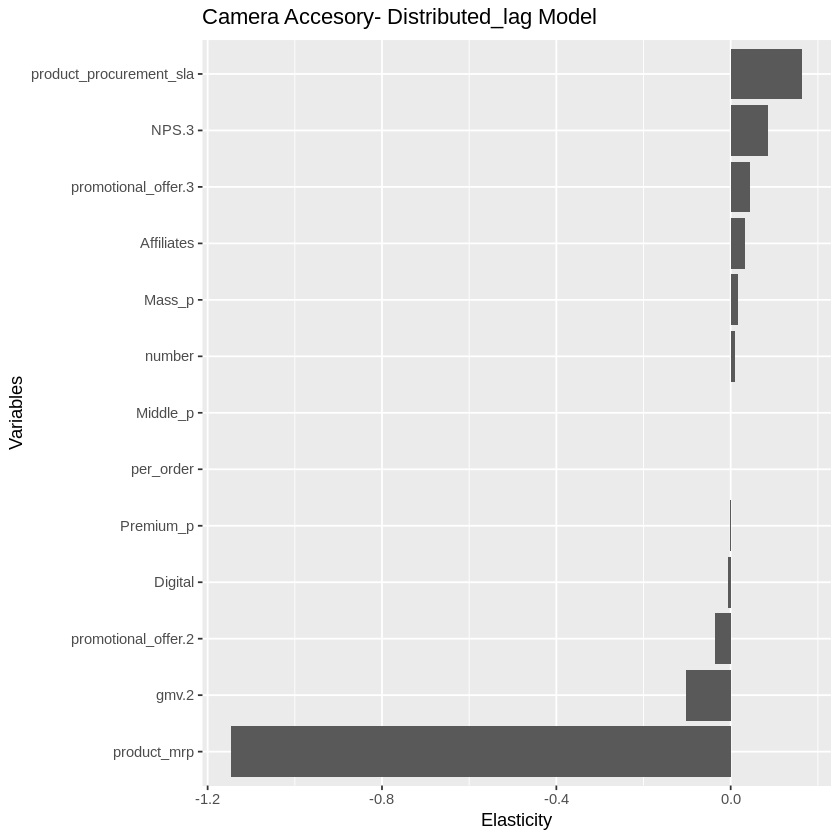

In [17]:
# Elasticity Analysis
train <- Dis_model
hrlm<-Distributed_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <- elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Camera Accesory- Distributed_lag Model") +xlab("Variables")

### Multiplicative + distributed model:

In [18]:
Multi_dist <-data[,-c(20:28)]
Multi_Dis_model_1 <- slide(Multi_dist, Var = "gmv",slideBy = -1)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -2)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -3)
Multi_dist <- na.omit(Multi_Dis_model_1)

Multi_dist$Content.Marketing[which(Multi_dist$Content.Marketing==0)] <-1
Multi_dist$per_order[which(Multi_dist$per_order==0)] <-0.01
Multi_dist$number[which(Multi_dist$number==0)] <-0.01
Multi_dist$TV[which(Multi_dist$TV==0)] <-0.01
Multi_dist <- log(Multi_dist)

distMulti <- lm(gmv~., Multi_dist)
print(summary(distMulti))



Remember to put Multi_dist in time order before running.

Lagging gmv by 1 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 2 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Multi_dist)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.117e-03 -8.713e-04  2.585e-05  7.891e-04  2.166e-03 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.585e-01  4.932e-01  -0.727  0.47853    
week_year                4.618e-03  5.824e-03   0.793  0.44013    
list_price               9.768e-01  1.412e-02  69.196  < 2e-16 ***
product_mrp              1.585e-02  1.647e-02   0.962  0.35110    
units                    5.532e-01  1.424e-01   3.885  0.00147 ** 
sla                     -1.207e-02  1.077e-02  -1.121  0.28001    
promotional_offer       -9.783e-03  1.197e-02  -0.817  0.42647    
number                  -7.544e-05  1.719e-04  -0.439  0.66701    
Total.Investment         6.840e-03  2.698e-02   0.254  0.80331    
TV                      -4.080e-04  5.104e-03  -0.080  0.93734    
Digital                  4.787e-03  5.036e-03   0.950  0.35696    
Sponsorsh

In [19]:
all_vif <- vif(distMulti )
signif_all <- names(all_vif)

 while(any(all_vif > 1.2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Multi_dist)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

DistributedMulti_Final_model <- selectedMod
summary(DistributedMulti_Final_model)


Call:
lm(formula = myForm, data = Multi_dist)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29936 -0.11515 -0.01188  0.11724  0.40993 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.98374    0.96489   4.129 0.000186 ***
units               27.65095    4.08623   6.767 4.49e-08 ***
Content.Marketing   -0.04211    0.04160  -1.012 0.317618    
per_order            0.11323    0.04397   2.575 0.013928 *  
list_price.1         0.31958    0.09505   3.362 0.001742 ** 
list_price.3         0.06730    0.09629   0.699 0.488725    
promotional_offer.3  0.07020    0.06579   1.067 0.292510    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1767 on 39 degrees of freedom
Multiple R-squared:  0.6772,	Adjusted R-squared:  0.6275 
F-statistic: 13.64 on 6 and 39 DF,  p-value: 2.813e-08


k-fold CROSS VALIDATION

In [20]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Multi_dist , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Linear Regression 

46 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 41, 40, 41, 42, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2394437  0.3436749  0.1853033

Tuning parameter 'intercept' was held constant at a value of TRUE


#### ELASTICITY ANALYSIS

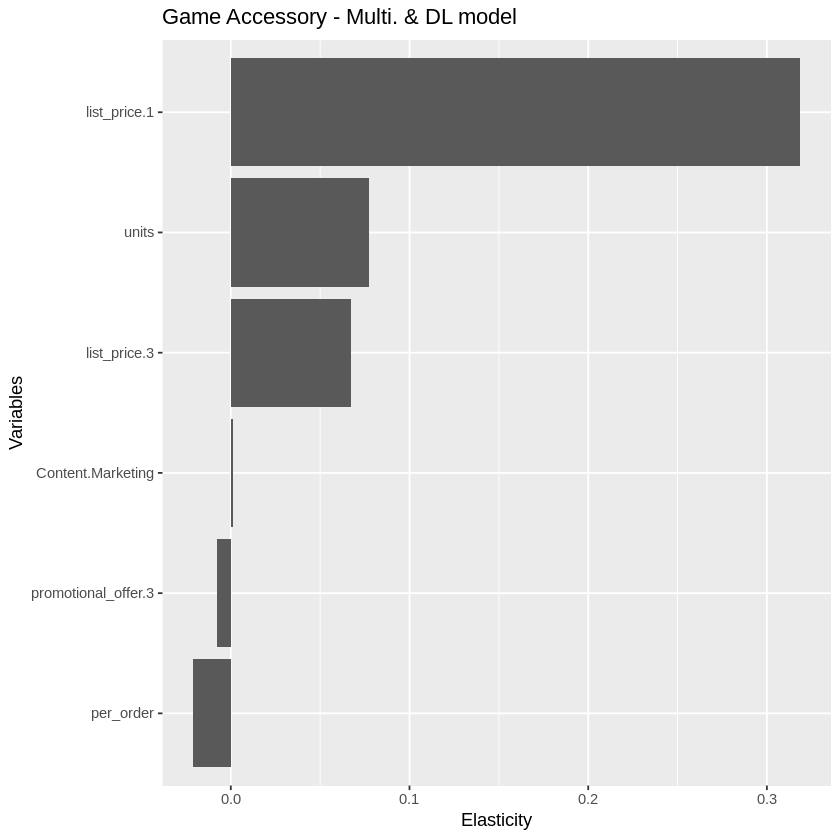

In [21]:
# estimating the elasticity coefficients
train <- Multi_dist

grlm <-DistributedMulti_Final_model 
elasticity <- function(var){
  
  elax1 <-as.numeric(grlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 

var_list <- list()

for(i in 2:length(grlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(grlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(grlm$coefficients[2:length(grlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Game Accessory - Multi. & DL model") +xlab("Variables")
